In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import csv
import uproot

from mpl_toolkits.mplot3d import axes3d 

In [2]:
def make_arr(files, lists):
    for i in range(len(files)):
        print(files[i])
        with open('outputs/' + files[i], 'r', newline='') as f:
            for line in f:
                l1 = []
                sl = line.split(',')
                for entry in sl:
                    
                    l1.append(np.float64(entry))

                arr = np.array(l1)
                lists[i].append(arr)

In [3]:
direction_dot = []; index_of_0_99 = [];

In [4]:
directions_truth = []; startpoints_truth = []; endpoints_truth = []; pathlen_truth = [];
trkphi_truth = []; trktheta_truth = []; energy_per_event = []; hits_per_event = [];

truth_files = ["directions_truth.txt", "startpoints_truth.txt", "endpoints_truth.txt",
              "pathlen_truth.txt", "trkphi_truth.txt","trktheta_truth.txt"]

truth_lists = [directions_truth, startpoints_truth, endpoints_truth, pathlen_truth,
              trkphi_truth, trktheta_truth, energy_per_event, hits_per_event]

make_arr(truth_files, truth_lists)

directions_truth.txt
startpoints_truth.txt
endpoints_truth.txt
pathlen_truth.txt
trkphi_truth.txt
trktheta_truth.txt


In [5]:
directions_reco = []; endpoints_reco = []; startpoints_reco = []; trklen_reco = [];
trkphi_reco = []; trkpidbestplane_reco = []; trktheta_reco = []; ntracks_reco = [];

reco_files = ["directions_reco.txt", "endpoints_reco.txt", "startpoints_reco.txt",
             "trklen_reco.txt", "trkphi_reco.txt", "trkpidbestplane_reco.txt",
             "trktheta_reco.txt", "ntracks_reco.txt"]
reco_lists = [directions_reco, endpoints_reco, startpoints_reco, trklen_reco, trkphi_reco,
              trkpidbestplane_reco, trktheta_reco, ntracks_reco]
make_arr(reco_files, reco_lists)


directions_reco.txt
endpoints_reco.txt
startpoints_reco.txt
trklen_reco.txt
trkphi_reco.txt
trkpidbestplane_reco.txt
trktheta_reco.txt
ntracks_reco.txt


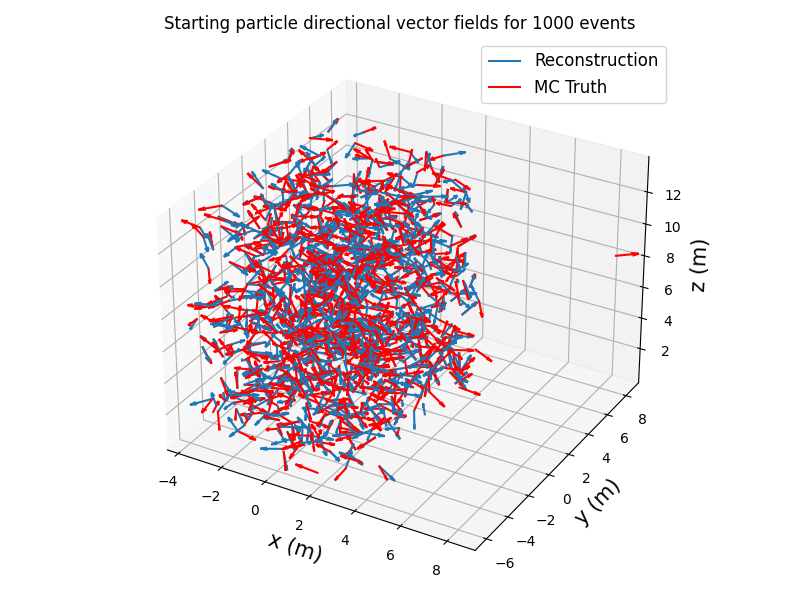

In [6]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(startpoints_reco[0][0]/100, startpoints_reco[0][1]/100, startpoints_reco[0][2]/100, directions_reco[0][0], directions_reco[0][1], directions_reco[0][2],label='Reconstruction')
ax.quiver(startpoints_truth[0][0]/100, startpoints_truth[0][1]/100, startpoints_truth[0][2]/100, directions_truth[0][0], directions_truth[0][1], directions_truth[0][2],color='r',label='MC Truth')
num = 1000
for i in range(1,num):
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("Starting particle directional vector fields for " + str(num) + " events", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [7]:
direction_dot = []
for k in range(1000):
    direction_dot.append(np.dot(directions_reco[k], directions_truth[k]))

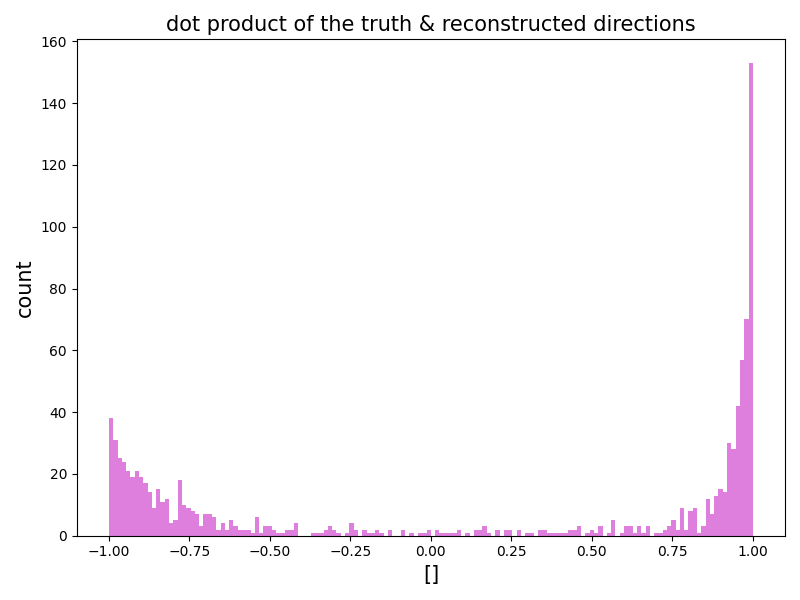

In [8]:
# Creating histogram
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(direction_dot, bins = 150,color='m',alpha=0.5)
ax.set_title("dot product of the truth & reconstructed directions",size=15)
ax.set_xlabel("[]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
plt.show()

In [9]:
index_of_0_99 = []
for k in range(1000):
    if direction_dot[k] >= 0.99:
        index_of_0_99.append(k)


In [10]:
#reco_lists = [directions_reco, endpoints_reco, startpoints_reco, trklen_reco, trkphi_reco,
#              trkpidbestplane_reco, trktheta_reco, ntracks_reco]

In [11]:
energy_plane0 = []; energy_plane1 = []; energy_plane2 = []; charge_plane0 = []; charge_plane1 = []; charge_plane2 = [];
energies = [energy_plane0, energy_plane1, energy_plane2]; charges = [charge_plane0, charge_plane1, charge_plane2];
energy_files = ["hit_energy_plane0.txt", "hit_energy_plane1.txt", "hit_energy_plane2.txt"]
charge_files = ["hit_charge_plane0.txt", "hit_charge_plane1.txt", "hit_charge_plane2.txt"]

make_arr(energy_files, energies); make_arr(charge_files, charges)

hit_energy_plane0.txt
hit_energy_plane1.txt
hit_energy_plane2.txt
hit_charge_plane0.txt
hit_charge_plane1.txt
hit_charge_plane2.txt


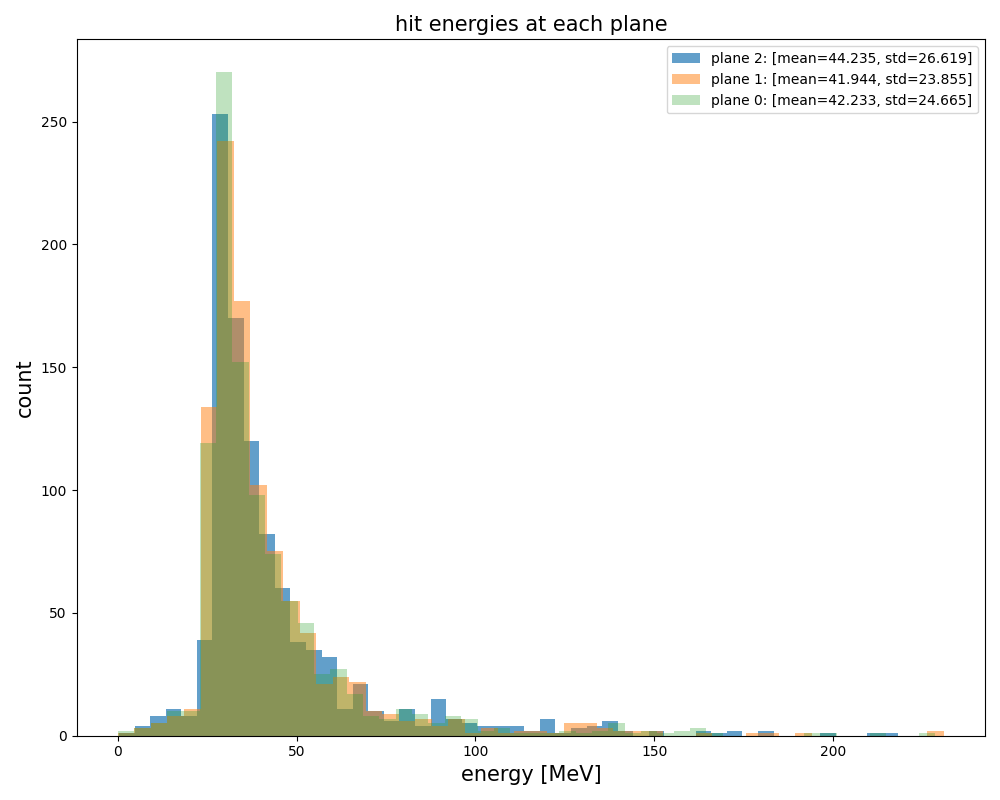

In [12]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(energy_plane2), bins = 50,alpha=0.7,
        label="plane 2: [mean=" + str(round(np.mean(np.array(energy_plane2)),3))
        + ', std=' + str(round(np.std(np.array(energy_plane2)),3)) + ']')

ax.hist(np.array(energy_plane1), bins = 50,alpha=0.5,
        label="plane 1: [mean=" + str(round(np.mean(np.array(energy_plane1)),3))
        + ', std=' + str(round(np.std(np.array(energy_plane1)),3)) + ']')

ax.hist(np.array(energy_plane0), bins = 50,alpha=0.3,
        label="plane 0: [mean=" + str(round(np.mean(np.array(energy_plane0)),3))
        + ', std=' + str(round(np.std(np.array(energy_plane0)),3)) + ']')

ax.set_title("hit energies at each plane",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
plt.legend()
plt.show()

In [13]:
dir_dotarr = np.array(direction_dot)

In [14]:
ep0_arr = np.array(energy_plane1)
ep1_arr = np.array(energy_plane1)
ep2_arr = np.array(energy_plane2)

In [15]:
import statistics as stat

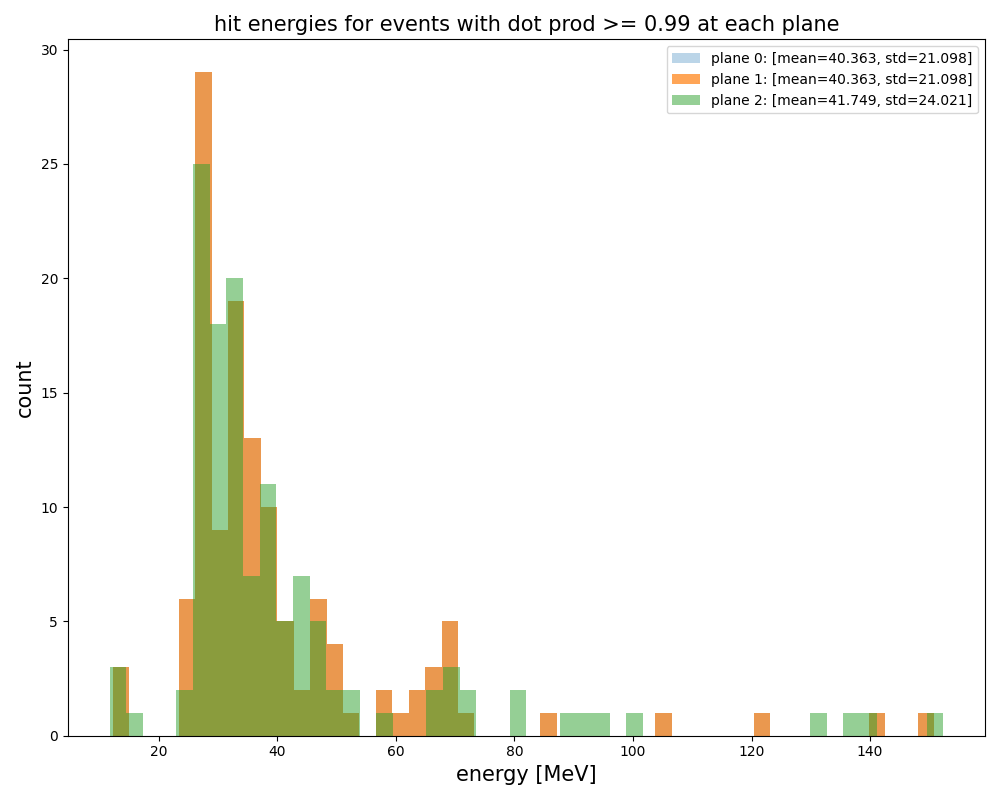

In [16]:
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(ep0_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.3,
        label="plane 0: [mean=" + str(round(np.mean(np.array(ep0_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep0_arr[dir_dotarr >= 0.99])),3)) + ']')

ax.hist(np.array(ep1_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.7,
        label="plane 1: [mean=" + str(round(np.mean(np.array(ep1_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep1_arr[dir_dotarr >= 0.99])),3)) + ']')

ax.hist(np.array(ep2_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.5,
        label="plane 2: [mean=" + str(round(np.mean(np.array(ep2_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep2_arr[dir_dotarr >= 0.99])),3)) + ']')


ax.set_title("hit energies for events with dot prod >= 0.99 at each plane",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

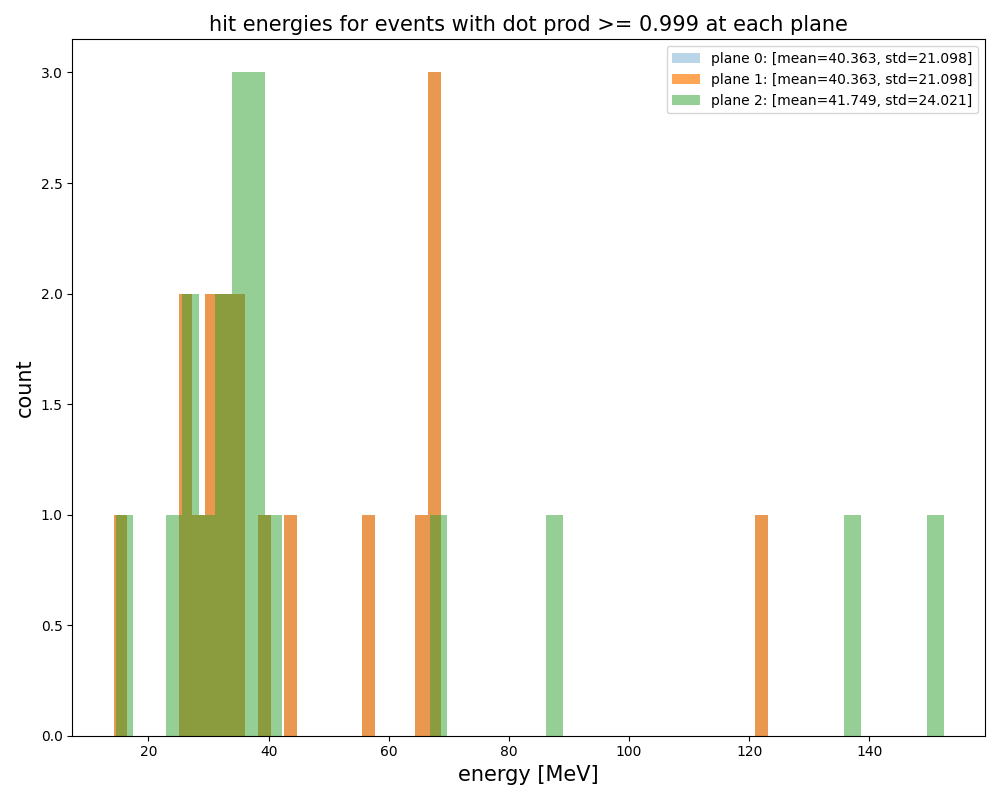

In [17]:
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(ep0_arr[dir_dotarr >= 0.999]), bins = 50,alpha=0.3,
        label="plane 0: [mean=" + str(round(np.mean(np.array(ep0_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep0_arr[dir_dotarr >= 0.99])),3)) + ']')

ax.hist(np.array(ep1_arr[dir_dotarr >= 0.999]), bins = 50,alpha=0.7,
        label="plane 1: [mean=" + str(round(np.mean(np.array(ep1_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep1_arr[dir_dotarr >= 0.99])),3)) + ']')

ax.hist(np.array(ep2_arr[dir_dotarr >= 0.999]), bins = 50,alpha=0.5,
        label="plane 2: [mean=" + str(round(np.mean(np.array(ep2_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ep2_arr[dir_dotarr >= 0.99])),3)) + ']')


ax.set_title("hit energies for events with dot prod >= 0.999 at each plane",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

In [18]:
ntracks_arr = np.array(ntracks_reco)
trklen_arr = np.array(trklen_reco)
bestplane_arr = np.array(trkpidbestplane_reco)

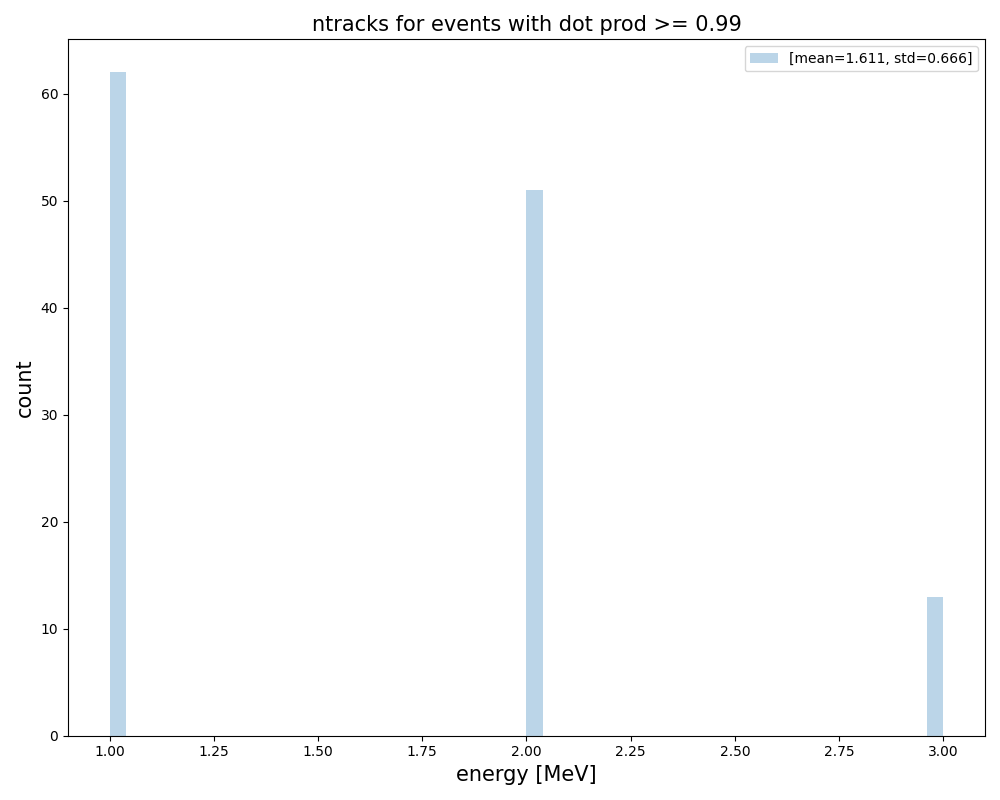

In [19]:
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(ntracks_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.3,
        label="[mean=" + str(round(np.mean(np.array(ntracks_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(ntracks_arr[dir_dotarr >= 0.99])),3)) + ']')


ax.set_title("ntracks for events with dot prod >= 0.99",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

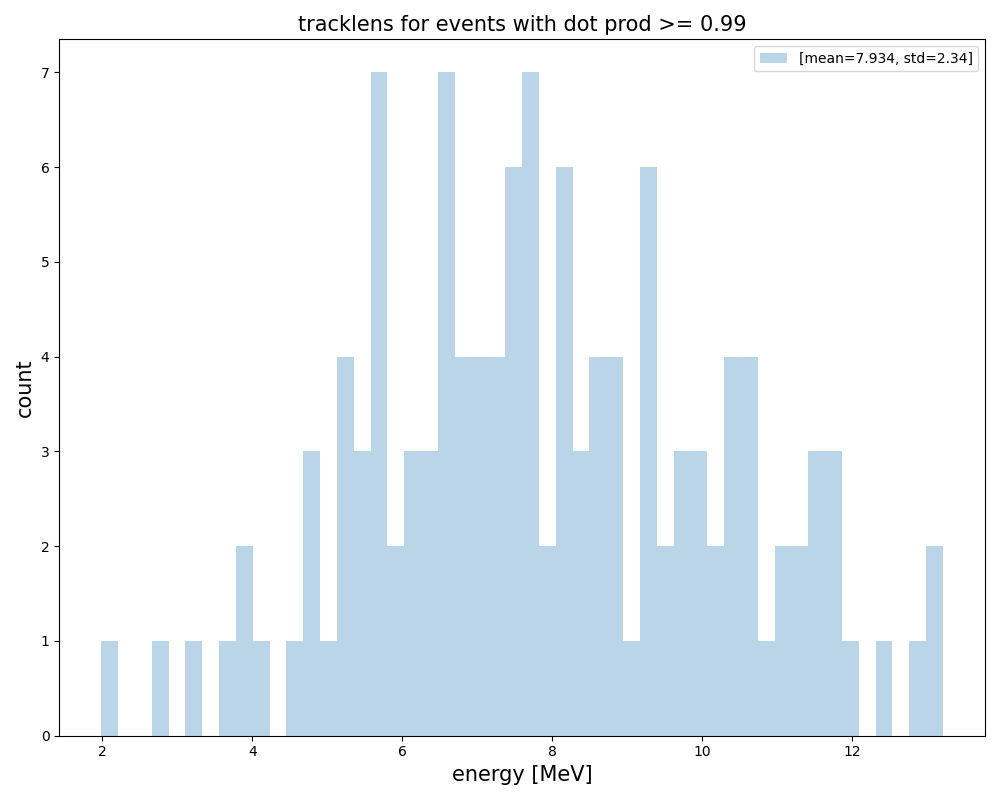

In [20]:
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(trklen_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.3,
        label="[mean=" + str(round(np.mean(np.array(trklen_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(trklen_arr[dir_dotarr >= 0.99])),3)) + ']')


ax.set_title("tracklens for events with dot prod >= 0.99",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

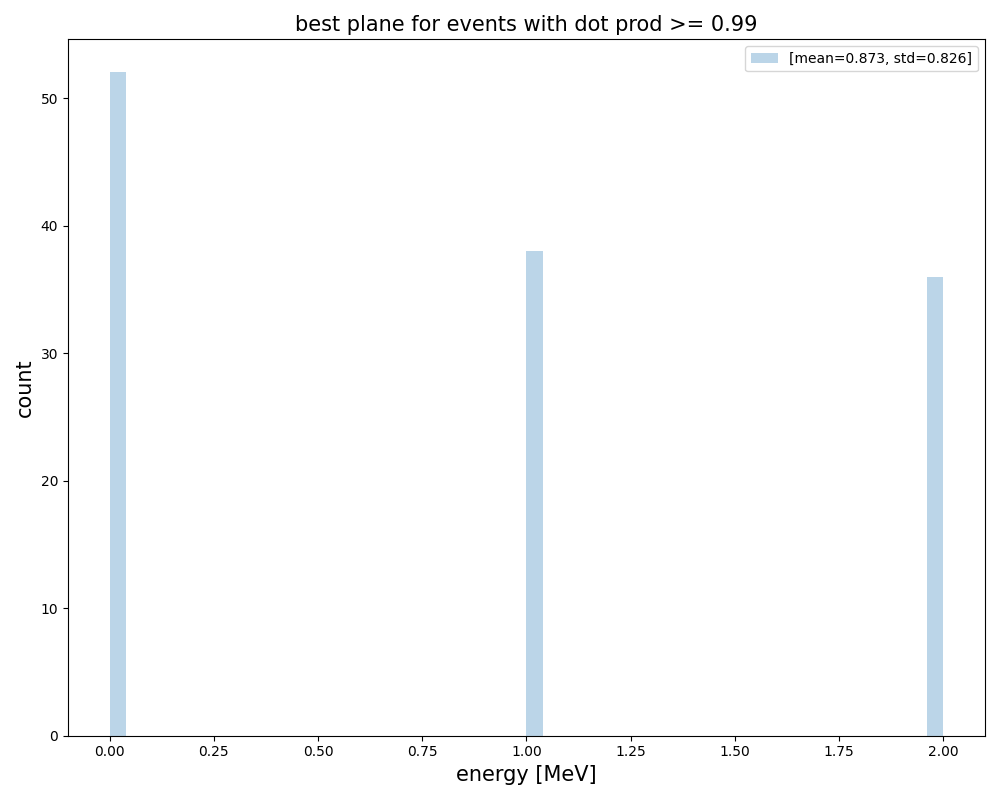

In [21]:
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(np.array(bestplane_arr[dir_dotarr >= 0.99]), bins = 50,alpha=0.3,
        label="[mean=" + str(round(np.mean(np.array(bestplane_arr[dir_dotarr >= 0.99])),3))
        + ', std=' + str(round(np.std(np.array(bestplane_arr[dir_dotarr >= 0.99])),3)) + ']')


ax.set_title("best plane for events with dot prod >= 0.99",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()